In [1]:
import numpy as np
import cv2
import pandas as pd

from skimage import data
from skimage.exposure import histogram
from matplotlib import pyplot as plt 

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
cd ../gdrive/My Drive/Colab Notebooks/_Image Processing/images_data

/gdrive/My Drive/Colab Notebooks/_Image Processing/images_data


## Method - Texture based Image Segmentation 

In [4]:
import matplotlib.pyplot as plt
from skimage import io, data

import numpy as np
from skimage.filters import threshold_otsu
import cv2
from skimage.color import rgb2gray

original = data.astronaut()
grayscale = rgb2gray(original)
img = grayscale.copy()
img.shape

(512, 512)

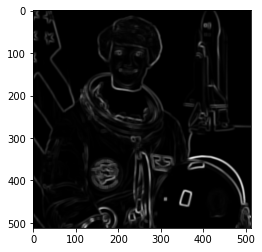

In [5]:
#Variance - not a great way to quantify texture

from scipy import ndimage 

k=7

img_mean = ndimage.uniform_filter(img, (k, k))

img_sqr_mean = ndimage.uniform_filter(img**2, (k, k))

img_var = img_sqr_mean - img_mean**2

plt.imshow(img_var, cmap='gray')

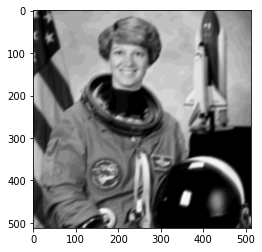

In [6]:
#GABOR - A great filter for texture - usually efficient
ksize=40

theta=np.pi/4

kernel = cv2.getGaborKernel((ksize, ksize), 2.5, theta, 14.0, 0.9, 0, ktype=cv2.CV_32F)

filtered_image = cv2.filter2D(img, cv2.CV_8UC3, kernel)

plt.imshow(filtered_image, cmap='gray')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


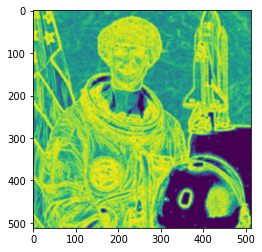

In [7]:
# Entropy 
from skimage.filters.rank import entropy
from skimage.morphology import disk
entropy_img = entropy(img, disk(3))
plt.imshow(entropy_img)

(array([2.205e+04, 0.000e+00, 0.000e+00, 0.000e+00, 1.351e+03, 1.700e+01,
        1.100e+01, 5.830e+02, 2.720e+02, 3.840e+02, 4.000e+00, 4.390e+02,
        1.300e+02, 3.180e+02, 1.890e+02, 2.990e+02, 1.380e+02, 3.170e+02,
        2.230e+02, 4.230e+02, 1.070e+02, 1.640e+02, 2.540e+02, 2.040e+02,
        2.210e+02, 2.570e+02, 2.110e+02, 1.780e+02, 2.620e+02, 2.840e+02,
        2.910e+02, 2.410e+02, 3.220e+02, 3.200e+02, 3.170e+02, 2.590e+02,
        3.970e+02, 3.970e+02, 4.450e+02, 5.660e+02, 5.460e+02, 9.650e+02,
        9.810e+02, 1.343e+03, 1.809e+03, 2.100e+03, 2.727e+03, 2.956e+03,
        3.651e+03, 3.992e+03, 4.126e+03, 4.483e+03, 4.389e+03, 4.622e+03,
        4.284e+03, 4.325e+03, 4.733e+03, 3.458e+03, 4.081e+03, 3.632e+03,
        3.484e+03, 3.421e+03, 3.045e+03, 3.056e+03, 3.190e+03, 2.961e+03,
        3.407e+03, 2.715e+03, 3.168e+03, 3.164e+03, 3.056e+03, 3.263e+03,
        3.622e+03, 3.417e+03, 4.197e+03, 3.878e+03, 4.016e+03, 4.254e+03,
        4.751e+03, 4.997e+03, 6.729e+0

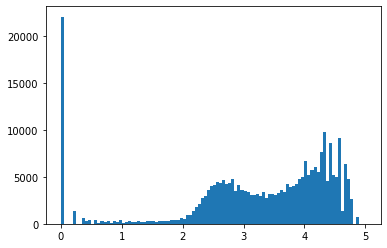

In [8]:
plt.hist(entropy_img.flat, bins=100, range=(0,5))  #.flat returns the flattened numpy array (1D)

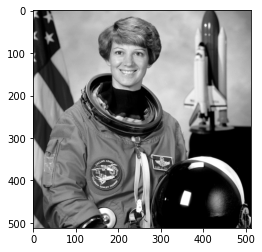

In [9]:
#Denoise for better results
from skimage.restoration import denoise_tv_chambolle
denoised_img = denoise_tv_chambolle(img, weight=3.5, eps=1.2, n_iter_max=200, multichannel=False)

plt.imshow(img, cmap='gray')

(array([31680.,  2686.,  1739.,  1475.,  1326.,  1252.,  1262.,  1087.,
         1058.,  1110.,  1108.,  1040.,   988.,   878.,   801.,   755.,
          781.,   941.,   901.,  1014.,   877.,   964.,   997.,   966.,
         1150.,  1224.,  1279.,  1943.,  1842.,  1481.,  1266.,  1076.,
         1015.,   916.,   950.,   816.,   810.,   743.,   648.,   698.,
          688.,   631.,   687.,   673.,   689.,   679.,   725.,   721.,
          734.,   745.,   784.,   794.,   762.,   758.,   767.,   786.,
          752.,   770.,   771.,   687.,   796.,   758.,   782.,   809.,
          853.,   906.,   867.,   889.,   819.,   759.,   787.,   827.,
          853.,   793.,   807.,   832.,   896.,   931.,   959.,  1038.,
         1057.,  1144.,  1192.,  1202.,  1374.,  1419.,  1498.,  1440.,
         1539.,  1498.,  1650.,  1613.,  1574.,  1566.,  1544.,  1538.,
         1632.,  1600.,  1681.,  1746.,  1700.,  1681.,  1684.,  1702.,
         1619.,  1632.,  1553.,  1591.,  1662.,  1685.,  1732., 

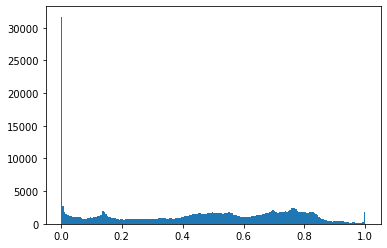

In [10]:
plt.hist(img.flat, bins=200, range=(0,1))  #.flat returns the flattened numpy array (1D)

## Method 1 - Thresholding based segmentation 

Thresholding is used to create a binary image from a grayscale image. 

It is the simplest way to segment objects from a background.

Thresholding algorithms implemented in scikit-image can be separated in two categories:

1. Histogram-based. The histogram of the pixels’ intensity is used and certain assumptions are made on the properties of this histogram (e.g. bimodal).

2. Local. To process a pixel, only the neighboring pixels are used. These algorithms often require more computation time.

In [11]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import try_all_threshold

img = data.page()

img.shape

(191, 384)

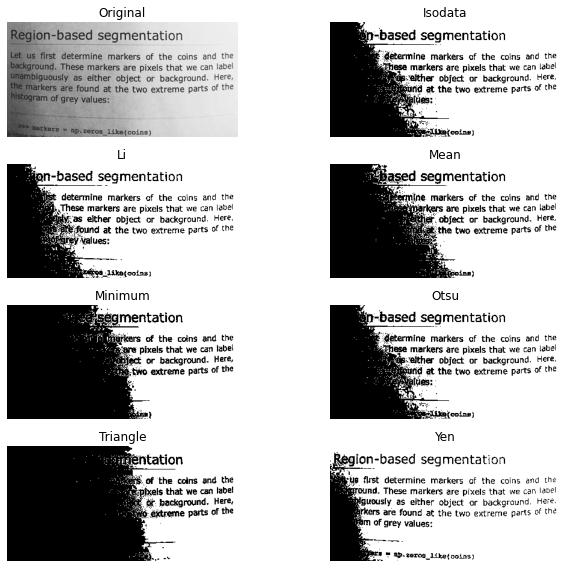

In [12]:
fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

(array([  12.,    8.,   11.,   43.,   31.,   72.,   57.,  119.,   88.,
         184.,  209.,  150.,  252.,  194.,  303.,  182.,  313.,  236.,
         297.,  206.,  310.,  288.,  197.,  297.,  198.,  246.,  190.,
         326.,  243.,  405.,  454.,  303.,  500.,  319.,  562.,  382.,
         616.,  413.,  576.,  398.,  643.,  655.,  374.,  545.,  383.,
         605.,  469.,  767.,  530.,  788.,  853.,  613., 1086.,  782.,
        1275.,  832., 1108.,  677., 1016.,  659.,  974., 1095.,  810.,
        1263.,  887., 1276.,  888., 1337.,  762., 1183., 1122.,  691.,
        1233.,  797., 1078.,  690.,  980.,  716., 1095.,  716., 1047.,
        1307., 1233., 2095.,  896., 1428., 1235., 2429., 2124., 3414.,
        3646., 2874., 3598.,  699.,  362.,  169.,  150.,   52.,   62.,
          81.]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95,  25.5 ,  28.05,  30.6 ,  33.15,  35.7 ,  38.25,
         40.8 ,  43.35,  45.9 ,  48.45,  51.  ,  53.55,  5

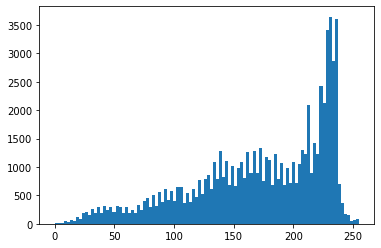

In [13]:
plt.hist(img.flat, bins=100, range=(0,255))  #.flat returns the flattened numpy array (1D)

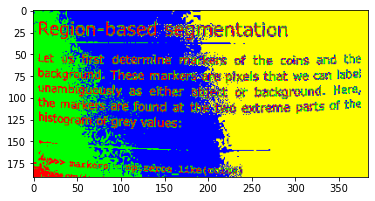

In [14]:
#Can perform manual segmentation but auto works fine
region1 = (img >= 0) & (img <75)
region2 = (img >= 75) & (img <140)
region3 = (img >= 140) & (img <200)
region4 = (img >= 200) & (img <=255)
all_regions = np.zeros((img.shape[0], img.shape[1], 3)) #Create 3 channel blank image of same size as original
all_regions[region1] = (1,0,0)
all_regions[region2] = (0,1,0)
all_regions[region3] = (0,0,1)
all_regions[region4] = (1,1,0)
plt.imshow(all_regions)

#### threshold_mean

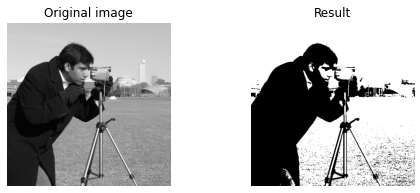

In [15]:
from skimage.filters import threshold_mean


image = data.camera()
thresh = threshold_mean(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Result')

for a in ax:
    a.axis('off')

plt.show()

#### threshold_minimum

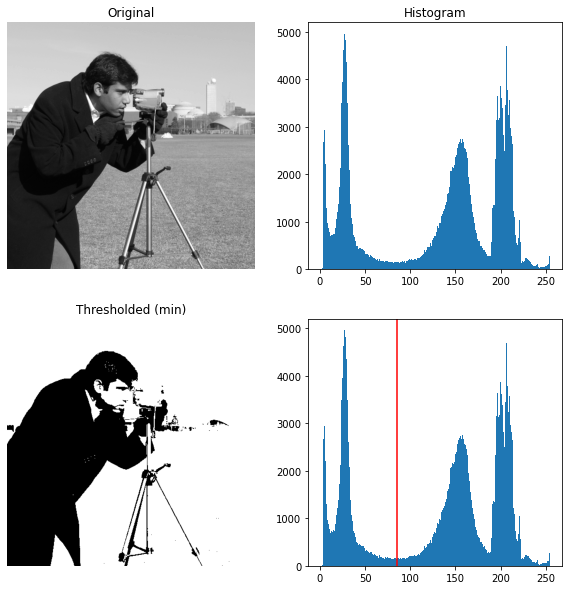

In [16]:
from skimage.filters import threshold_minimum


image = data.camera()

thresh_min = threshold_minimum(image)
binary_min = image > thresh_min

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(image, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(image.ravel(), bins=256)
ax[0, 1].set_title('Histogram')

ax[1, 0].imshow(binary_min, cmap=plt.cm.gray)
ax[1, 0].set_title('Thresholded (min)')

ax[1, 1].hist(image.ravel(), bins=256)
ax[1, 1].axvline(thresh_min, color='r')

for a in ax[:, 0]:
    a.axis('off')
plt.show()

#### threshold_otsu

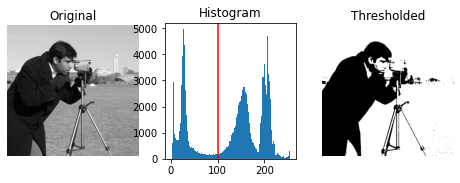

In [17]:
from skimage.filters import threshold_otsu


image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

#### Local Thresholding

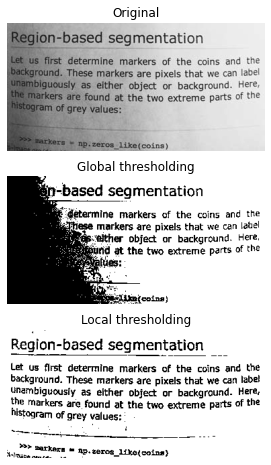

In [18]:
from skimage.filters import threshold_otsu, threshold_local


image = data.page()

global_thresh = threshold_otsu(image)
binary_global = image > global_thresh

block_size = 35
local_thresh = threshold_local(image, block_size, offset=10)
binary_local = image > local_thresh

fig, axes = plt.subplots(nrows=3, figsize=(7, 8))
ax = axes.ravel()
plt.gray()

ax[0].imshow(image)
ax[0].set_title('Original')

ax[1].imshow(binary_global)
ax[1].set_title('Global thresholding')

ax[2].imshow(binary_local)
ax[2].set_title('Local thresholding')

for a in ax:
    a.axis('off')

plt.show()

#### Global Thresholding 

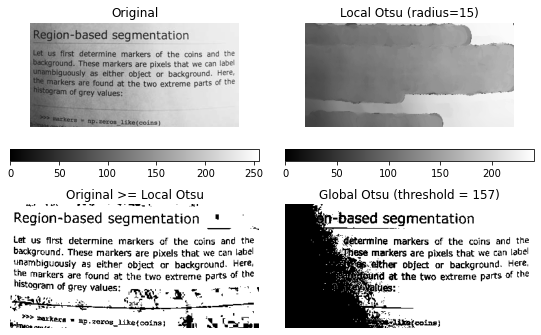

In [19]:
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte


img = img_as_ubyte(data.page())

radius = 15
footprint = disk(radius)

local_otsu = rank.otsu(img, footprint)
threshold_global_otsu = threshold_otsu(img)
global_otsu = img >= threshold_global_otsu

fig, axes = plt.subplots(2, 2, figsize=(8, 5), sharex=True, sharey=True)
ax = axes.ravel()
plt.tight_layout()

fig.colorbar(ax[0].imshow(img, cmap=plt.cm.gray),
             ax=ax[0], orientation='horizontal')
ax[0].set_title('Original')
ax[0].axis('off')

fig.colorbar(ax[1].imshow(local_otsu, cmap=plt.cm.gray),
             ax=ax[1], orientation='horizontal')
ax[1].set_title('Local Otsu (radius=%d)' % radius)
ax[1].axis('off')

ax[2].imshow(img >= local_otsu, cmap=plt.cm.gray)
ax[2].set_title('Original >= Local Otsu' % threshold_global_otsu)
ax[2].axis('off')

ax[3].imshow(global_otsu, cmap=plt.cm.gray)
ax[3].set_title('Global Otsu (threshold = %d)' % threshold_global_otsu)
ax[3].axis('off')

plt.show()

## Method 2 - Edge-based segmentation

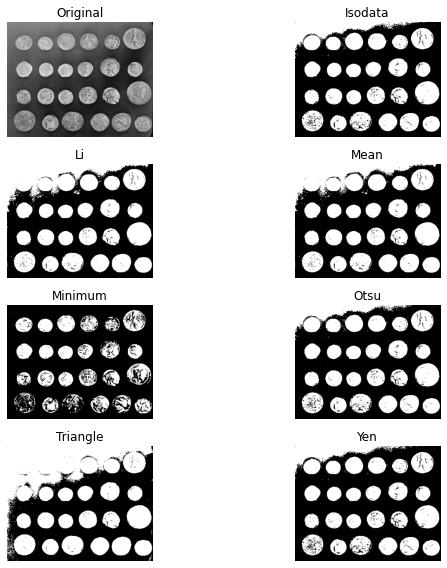

In [20]:
from skimage import data
from skimage.exposure import histogram
from skimage.filters import try_all_threshold

coins = data.coins()

fig, ax = try_all_threshold(coins, figsize=(10, 8), verbose=False)
plt.show()

Simply thresholding the image leads either to missing significant parts of the coins, or to merging parts of the background with the coins. 

This is due to the inhomogeneous lighting of the image.

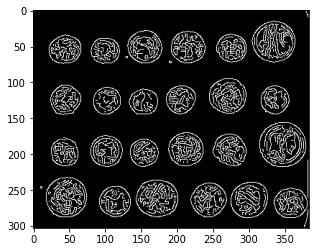

In [21]:
# Canny Edge Detection 

from skimage.feature import canny
edges = canny(coins/255.)
plt.imshow(edges)

In [22]:
from scipy import ndimage as ndi
fill_coins = ndi.binary_fill_holes(edges)

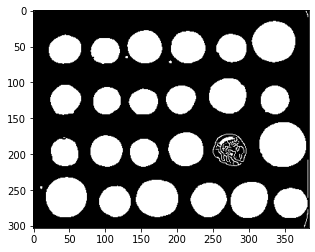

In [23]:
plt.imshow(fill_coins)

In [24]:
#  ndi.label function to remove objects smaller than a small threshold.
import numpy as np 

label_objects, nb_labels = ndi.label(fill_coins)

sizes = np.bincount(label_objects.ravel())

mask_sizes = sizes > 20
mask_sizes[0] = 0

coins_cleaned = mask_sizes[label_objects]

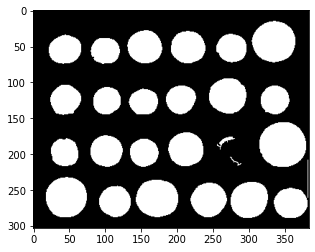

In [25]:
plt.imshow(coins_cleaned)

## Method 3 - Region Based segmentation 

In [26]:
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2

In [27]:
from skimage.filters import sobel
elevation_map = sobel(coins)

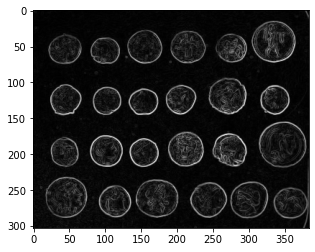

In [28]:
plt.imshow(elevation_map)

In [29]:
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2

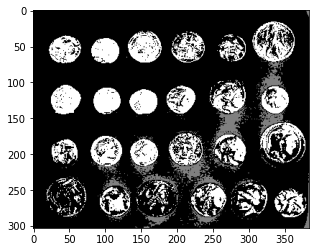

In [30]:
plt.imshow(markers)

In [31]:
from skimage.segmentation import watershed

segmentation = watershed(elevation_map, markers)

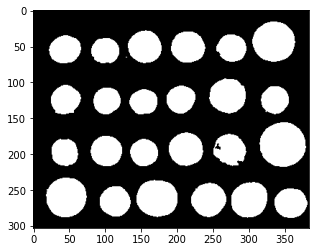

In [32]:
plt.imshow(segmentation)

In [33]:
segmentation = ndi.binary_fill_holes(segmentation - 1)

In [34]:
labeled_coins, _ = ndi.label(segmentation)

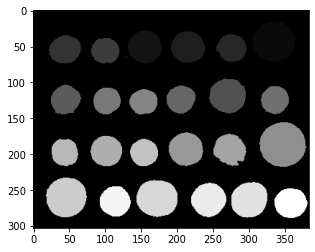

In [35]:
plt.imshow(labeled_coins)